In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from src.utils import view_all_df

In [3]:
df = pd.read_csv('../data/final_data.csv')

In [9]:
view_all_df(df[df['Country name']=='United States'])

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,rank,year,Positive affect,Negative affect
1977,United States,NaN,7.182,NaN,NaN,NaN,10.924,0.965,68.06,0.911,NaN,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2006,0.827,0.261
1978,United States,NaN,7.513,NaN,NaN,NaN,10.933,NaN,68.22,0.872,0.197,0.633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2007,0.829,0.232
1979,United States,NaN,7.280,NaN,NaN,NaN,10.922,0.953,68.38,0.878,0.255,0.668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2008,0.872,0.227
1980,United States,NaN,7.158,NaN,NaN,NaN,10.888,0.912,68.54,0.831,0.201,0.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2009,0.843,0.262
1981,United States,NaN,7.164,NaN,NaN,NaN,10.905,0.926,68.70,0.828,0.244,0.690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,2010,0.861,0.231
1982,United States,NaN,7.115,NaN,NaN,NaN,10.913,0.922,68.68,0.863,0.161,0.697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2011,0.836,0.273
1983,United States,NaN,7.026,NaN,NaN,NaN,10.928,0.903,68.66,0.823,0.215,0.710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,2012,0.834,0.260
1984,United States,NaN,7.249,NaN,NaN,NaN,10.939,0.925,68.64,0.792,0.274,0.747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2013,0.814,0.260
1985,United States,NaN,7.151,NaN,NaN,NaN,10.956,0.902,68.62,0.866,0.221,0.702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2014,0.834,0.281
1986,United States,NaN,6.864,NaN,NaN,NaN,10.977,0.904,68.60,0.849,0.219,0.698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2015,0.814,0.275


In [5]:
sorted(df.columns)

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'rank', 'year', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [84]:
cols_for_prediction = ['Country name', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year', 'Positive affect',
       'Negative affect']

In [121]:
X = df.loc[:, cols_for_prediction]
X.loc[:, 'year'] = X.loc[:, 'year'] - X['year'].min()
X.describe(include='all')

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year,Positive affect,Negative affect
count,2098,2098.000000,2062.000000,2085.000000,2043.000000,2066.000000,2009.000000,1988.000000,2098.000000,1927.000000,1933.000000
unique,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Cameroon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.471402,9.373060,0.812709,63.478503,0.746094,-0.001027,0.745650,8.768827,0.710003,0.268544
std,NaN,1.112676,1.154247,0.118203,7.468780,0.140766,0.161400,0.186261,4.486449,0.107100,0.085168
min,NaN,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.000000,0.322000,0.083000
25%,NaN,4.652250,8.470500,0.750000,58.704500,0.652000,-0.115000,0.688750,5.000000,0.625500,0.206000
50%,NaN,5.392000,9.462000,0.835000,65.280000,0.767000,-0.027000,0.801000,9.000000,0.722000,0.258000
75%,NaN,6.282500,10.360750,0.905000,68.660000,0.859000,0.089000,0.869000,13.000000,0.799000,0.320000


#### Handle NAN values

In [122]:
X = X.dropna().reset_index(drop=True)

#### Create train and test split

In [124]:
X_train = X.values[:, 2:]
y_train = X.values[:, 1].reshape(-1)

In [140]:
cv_splits = []
cv_ignored_countries = []
for country in tqdm(X['Country name'].unique()):
    train = X[X['Country name'] != country].index.values
    test = X[X['Country name'] == country].index.values
    
    # Only append to the cv split if the test size is atleast 3
    if len(test)>2:
        cv_splits.append((train, test))
    else:
        cv_ignored_countries.append(country)

print(f'Total cross_validaitons = {len(cv_splits)}')
print(f'{len(cv_ignored_countries)} countries ignored for cv splits. List: \n{cv_ignored_countries}')

  0%|          | 0/155 [00:00<?, ?it/s]

Total cross_validaitons = 149
6 countries ignored for cv splits. List: 
['Belize', 'Guyana', 'Jordan', 'Qatar', 'Saudi Arabia', 'Suriname']


#### Training

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import plot_partial_dependence

In [143]:
parameters = {'n_estimators': [50, 100], 'max_depth': [2, 5, None]}
regr = RandomForestRegressor()
cv_model = GridSearchCV(regr, parameters, cv=cv_splits, n_jobs=-1, verbose=4)
cv_model.fit(X_train, y_train)

Fitting 149 folds for each of 6 candidates, totalling 894 fits


GridSearchCV(cv=[(array([  12,   13,   14, ..., 1705, 1706, 1707]),
                  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])),
                 (array([   0,    1,    2, ..., 1705, 1706, 1707]),
                  array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])),
                 (array([   0,    1,    2, ..., 1705, 1706, 1707]),
                  array([25, 26, 27, 28, 29])),
                 (array([   0,    1,    2, ..., 1705, 1706, 1707]),
                  array([30, 31, 32, 33])),
                 (array([   0,    1,    2, ..., 1705, 1706, 1707]),
                  array([34, 35, 36, 37, 38, 3...
                  array([306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320])),
                 (array([   0,    1,    2, ..., 1705, 1706, 1707]),
                  array([321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
       334, 335])),
                 (array([   0,    1,    2, ..., 1705, 1706, 1707]),
      

In [144]:
y_pred = cv_model.predict(X_train)
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'R2 score = {r2_score(y_train, y_pred)}')

MSE = 0.17402121759482725
R2 score = 0.8652131368702568


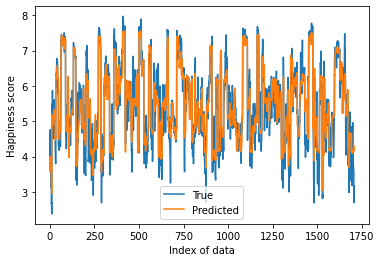

In [145]:
plt.plot(y_train, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Happiness score')
plt.xlabel('Index of data')
plt.legend()

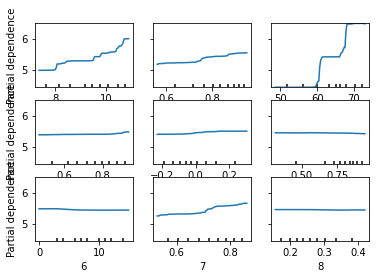

In [146]:
col_0, col_1 = 0, 6
plot_partial_dependence(cv_model.best_estimator_, X_train, range(9))#[col_0, col_1, (col_0,col_1)]) 